<a href="https://colab.research.google.com/github/luanrossini/eda_supermarket_sales/blob/main/EDA_SuperMarket_Sale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('supermarket_sales.csv')

# Exploratória do dataframe

In [3]:
# Shape do dataframe
df.shape

(1000, 17)

O df tem 1000 linhas e 17 colunas

In [4]:
# Primeiras linhas do df
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
# Últimas linhas do df
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [6]:
# Exploratória das colunas do df
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [7]:
# Tipagem dos dados do df
df.dtypes

,0
Invoice ID,object
Branch,object
City,object
Customer type,object
Gender,object
Product line,object
Unit price,float64
Quantity,int64
Tax 5%,float64
Total,float64


In [8]:
# Descrição estatística inicial do df
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


# Limpeza e Tratamento dos dados

In [9]:
# Verificação de Dados nulos ou faltantes
df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


Nenhum dado nulo ou  faltante no df

In [10]:
# Verificação de dados duplicados no df
df.duplicated().sum()

0

Não há dados duplicados no df

In [11]:
# Tratando e normalizando a nomenclatura das colunas do df para ser tudo minúsculo, sem caractere especial e sem espaços

df.columns = df.columns.str.lower()  # tudo minúsculo
df.columns = df.columns.str.replace(' ', '_', regex=True)  # substitui espaços por underscore
df.columns = df.columns.str.replace(r'\W', '', regex=True)  # remove caracteres especiais

df.columns

Index(['invoice_id', 'branch', 'city', 'customer_type', 'gender',
       'product_line', 'unit_price', 'quantity', 'tax_5', 'total', 'date',
       'time', 'payment', 'cogs', 'gross_margin_percentage', 'gross_income',
       'rating'],
      dtype='object')

# Q&A

## 1 - Quais os produtos que são mais comprados por mulheres e homens?

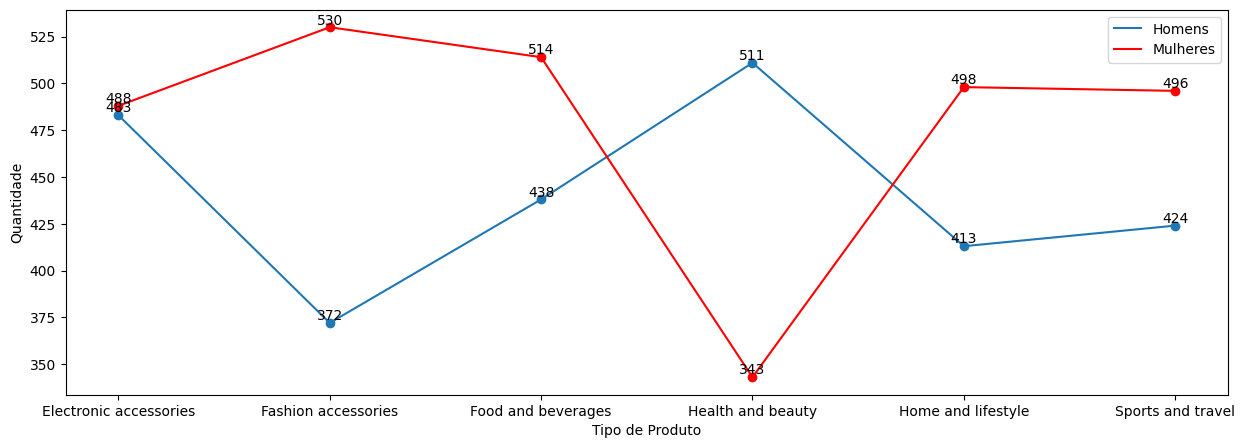

In [12]:
q1 = df.groupby(['gender', 'product_line'])['quantity'].sum().reset_index()
q1_male = q1.loc[(q1['gender'] == 'Male')]
q1_female = q1.loc[(q1['gender'] == 'Female')]

fig = plt.figure(figsize=(15,5))

fig.add_subplot(111)
plt.plot(q1_male['product_line'],
         q1_male['quantity'],
         label = "Homens")

plt.plot(q1_female['product_line'],
         q1_female['quantity'],
         color = 'r',
         label = "Mulheres")

plt.scatter(q1_male['product_line'],
            q1_male['quantity'])

plt.scatter(q1_female['product_line'],
            q1_female['quantity'],
            color = 'r')
for i, value in enumerate(q1_male['quantity']):
    plt.text(q1_male['product_line'].iloc[i], value, f'{value}',
             ha='center', va='bottom')

for i, value in enumerate(q1_female['quantity']):
    plt.text(q1_female['product_line'].iloc[i], value, f'{value}',
             ha='center', va='bottom')

plt.xlabel("Tipo de Produto")
plt.ylabel("Quantidade")
plt.legend()
plt.show(fig)

Produtos mais comprados por homens: Saúde e Beleza (530); Acessórios Eletronicos (483); Comidas e Bebidas (438); Esportes e Viagens (424); Casa e estilo de vida (413) e Acessórios de beleza (372).

Já as mulheres compram mais Acessórios de Beleza (530); Comidas e Bebias (514); Casa  e Estilo de Vida (498); Esportes e Viagens (496); Acessórios Eletronicos (488) e Saúde e beleza (343).

Podemos notar que a grande maioria das vendas são realizadas por mulheres e que os produtos de saúde e beleza são muito mais consumidos pelos homens que pelas mulheres. Já para acessórios de beleza a diferença é grande na quantidade, representando uma volumetria muito maior para as mulheres.

É interessante analisar que o produto mais vendido para as mulheres é o menos vendido para os homens e o mesmo acontece no caso oposto.

# 2 - Quais os produtos mais vendidos?

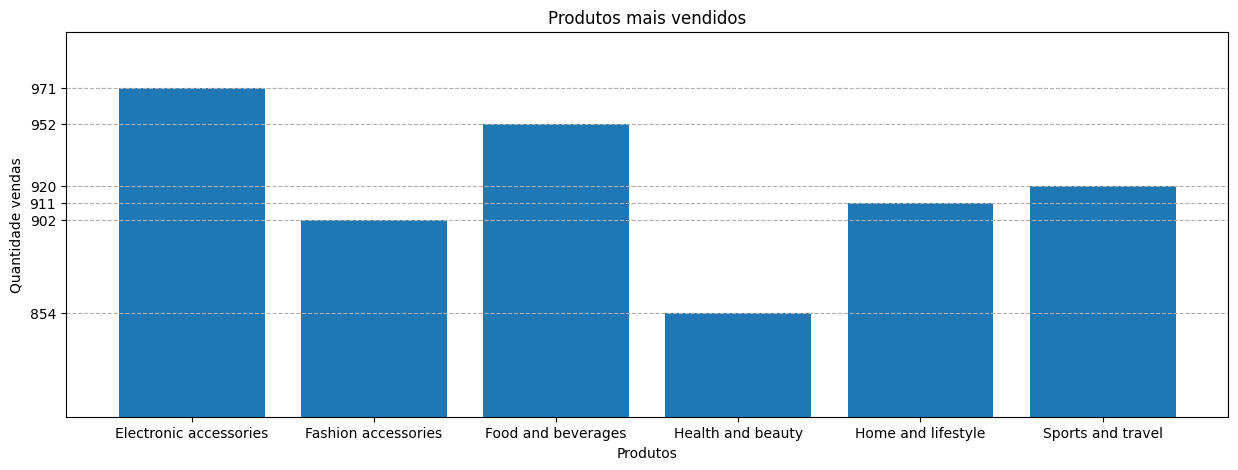

In [17]:
q2 = df.groupby('product_line')['quantity'].sum().reset_index()

fig = plt.figure(figsize=(15,5))

plt.bar(q2['product_line'], q2['quantity'])
plt.yticks(q2['quantity'])
plt.ylim(800,1000)
plt.grid(axis='y', linestyle= '--')
plt.ylabel("Quantidade vendas")
plt.xlabel("Produtos")
plt.title("Produtos mais vendidos")
plt.show()

Os produtos mais vendidos no supermercado são: Acessórios Eletrônicos (971), Bebidas e comidas (952), Esportes e Viagens (920), Casa e Estilo de Vida (911), Acessórios de beleza (902) e por último Saúde e Beleza (854).

# 3 - Qual o perfil de compra dos clientes do supermercado?

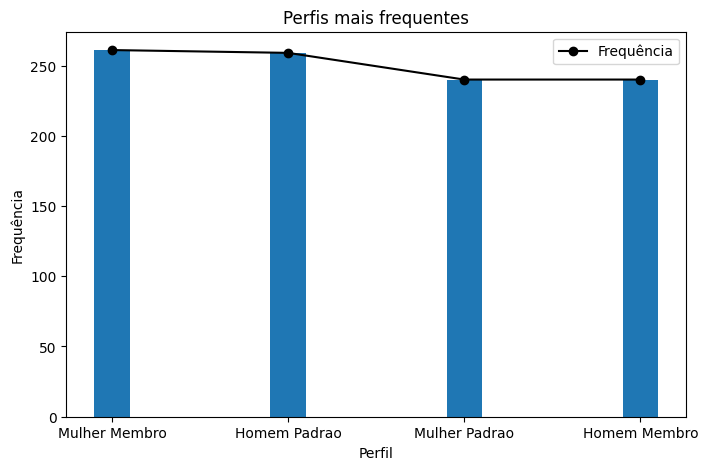

In [19]:
# Dividindo os clientes em 4 grandes grupos: Homem Membro/ Mulher Membro/ Homem Padrão/ Mulher Padrão
homem_membro = df[(df['gender'] == 'Male') & (df['customer_type'] == 'Member')]
homem_padrao = df[(df['gender'] == 'Male') & (df['customer_type'] == 'Normal')]
mulher_membro = df[(df['gender'] == 'Female') & (df['customer_type'] == 'Member')]
mulher_padrao = df[(df['gender'] == 'Female') & (df['customer_type'] == 'Normal')]

cont_mulher_membro = len(mulher_membro)
cont_mulher_normal = len(mulher_padrao)
cont_homem_membro = len(homem_membro)
cont_homem_normal = len(homem_padrao)

contagem = [cont_mulher_membro, cont_mulher_normal, cont_homem_membro, cont_homem_normal]
nomes_index = ['Mulher Membro', 'Mulher Padrao', 'Homem Membro', 'Homem Padrao']
nome_col = ['Quantidade']

df_cont = pd.DataFrame(contagem, index=nomes_index, columns=nome_col)
q3 = df_cont.sort_values(by='Quantidade', ascending=False)
q3.reset_index(inplace=True)
q3.rename(columns={'index':'Perfil'}, inplace = True)

fig = plt.figure(figsize=(8,5))


plt.bar(q3['Perfil'], q3['Quantidade'], width = 0.2)

plt.plot(q3['Perfil'], q3['Quantidade'], color='k', marker = 'o', label = 'Frequência')

plt.title('Perfis mais frequentes')
plt.xlabel('Perfil')
plt.ylabel('Frequência')
plt.legend()
plt.show()

Considerações: O número de homens e mulheres é praticamente o mesmo, no total. Já se tratando da segmentação de clientes padrão ou membros, nota-se que as mulheres que participam dos membros são maioria enquanto os homens não participantes dos membros de descontos são minoria.

Uma análise posterior dos dados seria analisar quais as motivações que fazem as mulheres membros serem maioria, como por exemplo descontos em produtos específicos do sexo feminino, dias da semana de maiores compras, horários, etc.

# 4 - Qual o desempenho de vendas das 3 filiais?

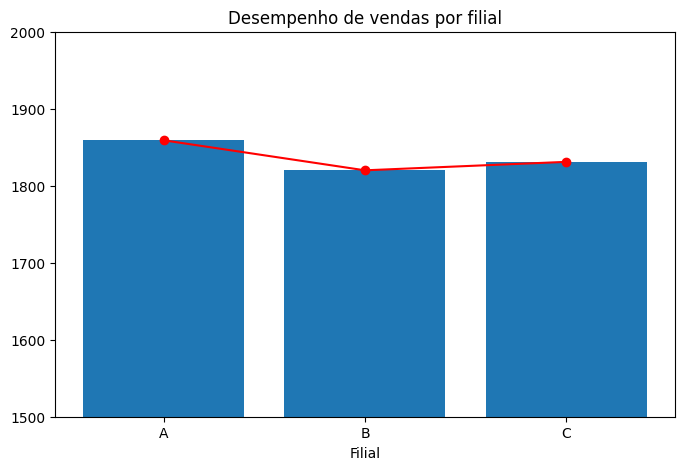

In [28]:
q4 = df.groupby('branch')['quantity'].sum().reset_index()

fig = plt.figure(figsize=(8,5))
fig.add_subplot()
plt.plot(q4['branch'], q4['quantity'], color = 'red', marker = 'o', label = 'Quantidade')

plt.bar(q4['branch'], q4['quantity'])
plt.ylim(1500,2000)

plt.xlabel("Filial")
plt.title("Desempenho de vendas por filial")
plt.show(fig)

Consideração: Filial A (Yangon) é a filial que mais vendeu, seguido pela filial C (Mandalay) e em último a filial B (Naypyitaw)

# 5 - Existe um horário que ocorrem mais vendas? Se sim, quais são os períodos?

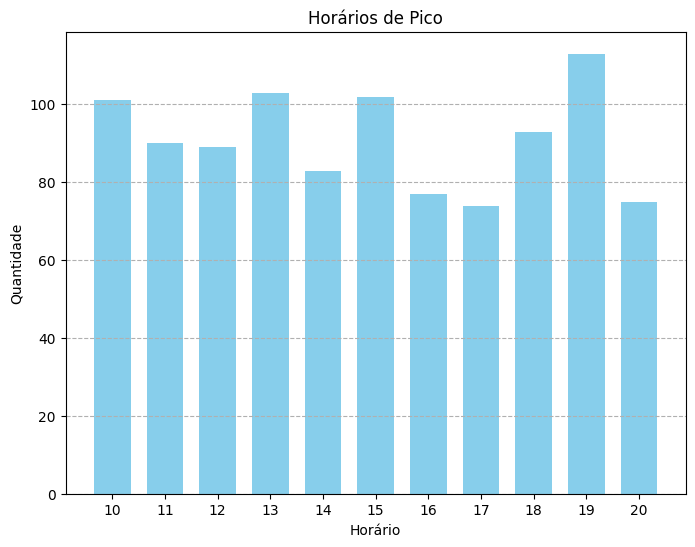

In [37]:
df['time'] = df['time'].astype(str)
df['Horas'] = df['time'].str.split(':').str[0]
contagem_hora = df['Horas'].value_counts().sort_index()

q5 = contagem_hora.reset_index().rename(columns={'index': 'Horario', 'Horas': 'Quantidade'})
q5.columns = ['Horario', 'Quantidade']

fig = plt.figure(figsize=(8,6))

plt.bar(q5['Horario'], q5['Quantidade'], width=0.7, color='skyblue')

plt.grid(axis='y', linestyle='--')
plt.xlabel('Horário')
plt.ylabel('Quantidade')
plt.title('Horários de Pico')
plt.show()


Considerações: As vendas acontecem principalmente nos horários de 10h, 13h, 15h e 19h. Todos esses horários tem a quantidade de vendas acima de 100 unidades.

# 6 - Clientes que são Membros tem receita maior que os clientes padrão?

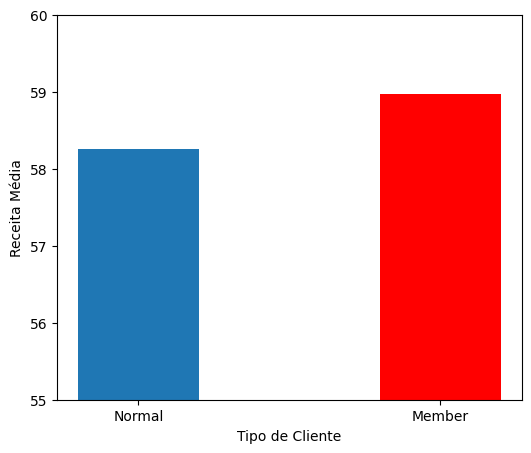

In [49]:
df_membro = df.loc[(df['customer_type'] == 'Member')]
df_normal = df.loc[(df['customer_type'] == 'Normal')]

df['Receita Média Normal'] = df_normal['total'].sum() / df_normal['quantity'].sum()
df['Receita Média Membro'] = df_membro['total'].sum() / df_membro['quantity'].sum()

fig = plt.figure(figsize=(6,5))

fig.add_subplot()
plt.bar(df_normal['customer_type'], df_normal['Receita Média Normal'], label = "Clientes Normal", width = 0.4)

plt.bar(df_membro['customer_type'], df_membro['Receita Média Membro'], color = 'r',label = "Clientes Membro", width = 0.4)
plt.ylim(55,60)
plt.xlabel("Tipo de Cliente")
plt.ylabel("Receita Média")
plt.show(fig)

Consideração: Clientes que são membros tem um ticket médio ligeiramente maior que os clientes padrão